# NAME - ANIBBAN DUTTA
# REG NO. - 19BCB0015

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing and loading the dataset

In [2]:
data = pd.read_csv("COVID-19_Daily_Testing.csv")
data.info()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         89 non-null     object
 3   Cases                                         89 non-null     object
 4   People Not-Positive - Total                   89 non-null     object
 5   People Tested - Age 0-17                      89 non-null     int64 
 6   People Tested - Age 18-29                     89 non-null     object
 7   People Tested - Age 30-39                     89 non-null     object
 8   People Tested - Age 40-49                     89 non-null     int64 
 9   People Tested - Age 50-59                     89 non-null     int64 
 10  Peop

In [3]:
data.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,...,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,...,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,...,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,...,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,...,1,8,7,0,2,0,1,2,1,9


# Data Cleaning and Processing

In [4]:
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')
data['Cases'] = pd.to_numeric(data['Cases'])     
data['Tests'] = pd.to_numeric(data['Tests'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         89 non-null     int64 
 3   Cases                                         89 non-null     int64 
 4   People Not-Positive - Total                   89 non-null     object
 5   People Tested - Age 0-17                      89 non-null     int64 
 6   People Tested - Age 18-29                     89 non-null     object
 7   People Tested - Age 30-39                     89 non-null     object
 8   People Tested - Age 40-49                     89 non-null     int64 
 9   People Tested - Age 50-59                     89 non-null     int64 
 10  Peop

# Scaling the dataset and splitting X and y into training and testing sets

In [5]:
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state= 0, train_size = 0.7)

# Applying Linear Regression

In [6]:
reg=LinearRegression()
model=reg.fit(X_train,y_train)
r_sq=model.score(X_train,y_train)
print ('Coefficient of Determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)
c=model.intercept_[0]
m=model.coef_[0][0]
print("The linear model is: Y = {:.5} + {:.5}X".format(c, m))

Coefficient of Determination: 0.7824890466468288
Intercept: [93.40646219]
Slope: [[0.18227443]]
The linear model is: Y = 93.406 + 0.18227X


# Predicting the test set results

In [7]:
y_pred = model.predict(X_test)

# Visualising the training set results

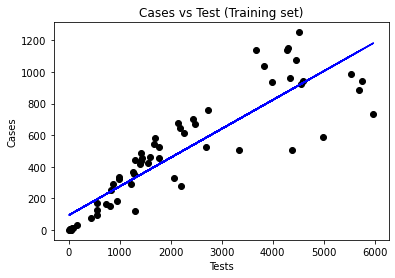

In [8]:
plt.scatter (X_train, y_train, color = 'black')
plt.plot (X_train, reg.predict (X_train), color = 'blue')
plt.title('Cases vs Test (Training set)')
plt.xlabel('Tests')
plt.ylabel('Cases')
plt.show()

# Visualising the test set results

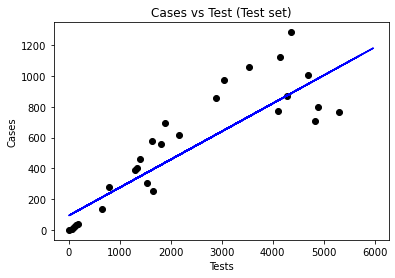

In [9]:
plt.scatter (X_test, y_test, color = 'black')
plt.plot (X_train, reg.predict (X_train), color = 'blue') 
plt.title('Cases vs Test (Test set)')
plt.xlabel('Tests')
plt.ylabel('Cases')
plt.show()

# Evaluation Metrics

In [10]:
print("Mean Absolute Error(MAE) =",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error(MSE) =",mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error(RMSE) =',np.sqrt(mean_squared_error(y_test,y_pred)))
print("Root Mean Squared Log Error(RMSLE) =",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print("R Squared(R2) Error=",r2_score(y_test,y_pred))

Mean Absolute Error(MAE) = 154.7285494795334
Mean Squared Error(MSE) = 34467.307409007466
Root Mean Squared Error(RMSE) = 185.65372985482264
Root Mean Squared Log Error(RMSLE) = 5.223883271209436
R Squared(R2) Error= 0.7540549598751365
